## Get the [data](https://www.kaggle.com/datasets/ydalat/lifestyle-and-wellbeing-data)

In [5]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
!pip install kaggle

In [10]:
import os
os.environ["KAGGLE_CONFIG_DIR"] = "/content/gdrive/MyDrive/kaggle/"

In [11]:
!kaggle datasets download -d ydalat/lifestyle-and-wellbeing-data

  0% 0.00/294k [00:00<?, ?B/s]
100% 294k/294k [00:00<00:00, 95.2MB/s]


In [12]:
import zipfile

# unzip the downloaded data
zip_ref = zipfile.ZipFile("/content/lifestyle-and-wellbeing-data.zip")
zip_ref.extractall()
zip_ref.close()

## Preprocessing Data

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# read data
data = pd.read_csv("/content/Wellbeing_and_lifestyle_data_Kaggle.csv")

In [14]:
data.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9


In [15]:
# remove the timestamp column
data.drop('Timestamp', axis=1, inplace=True)

In [16]:
data.head()

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,3,2,2,5,0,5,2,0,1,6,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,2,3,4,3,8,10,5,2,2,5,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,2,3,3,4,4,10,3,2,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,3,3,10,3,10,7,2,5,2,3,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,5,1,3,3,10,4,2,4,2,5,...,7,0,0,2,8,1,5,51 or more,Female,663.9


In [84]:
# check the datatype, to make sure all of them is number
data.dtypes

FRUITS_VEGGIES               int64
DAILY_STRESS                 Int64
PLACES_VISITED               int64
CORE_CIRCLE                  int64
SUPPORTING_OTHERS            int64
SOCIAL_NETWORK               int64
ACHIEVEMENT                  int64
DONATION                     int64
BMI_RANGE                    int64
TODO_COMPLETED               int64
FLOW                         int64
DAILY_STEPS                  int64
LIVE_VISION                  int64
SLEEP_HOURS                  int64
LOST_VACATION                int64
DAILY_SHOUTING               int64
SUFFICIENT_INCOME            int64
PERSONAL_AWARDS              int64
TIME_FOR_PASSION             int64
WEEKLY_MEDITATION            int64
AGE                         object
GENDER                      object
WORK_LIFE_BALANCE_SCORE    float64
dtype: object

In [85]:
# covert DAILY_STRESS data type to int64
data["DAILY_STRESS"] = data["DAILY_STRESS"].astype('Int64')

In [87]:
# check the data type again
data["DAILY_STRESS"]

0        2
1        3
2        3
3        3
4        1
        ..
15967    3
15968    3
15969    3
15970    1
15971    4
Name: DAILY_STRESS, Length: 15972, dtype: Int64

In [88]:
# check null values
data.isnull().sum()

FRUITS_VEGGIES             0
DAILY_STRESS               1
PLACES_VISITED             0
CORE_CIRCLE                0
SUPPORTING_OTHERS          0
SOCIAL_NETWORK             0
ACHIEVEMENT                0
DONATION                   0
BMI_RANGE                  0
TODO_COMPLETED             0
FLOW                       0
DAILY_STEPS                0
LIVE_VISION                0
SLEEP_HOURS                0
LOST_VACATION              0
DAILY_SHOUTING             0
SUFFICIENT_INCOME          0
PERSONAL_AWARDS            0
TIME_FOR_PASSION           0
WEEKLY_MEDITATION          0
AGE                        0
GENDER                     0
WORK_LIFE_BALANCE_SCORE    0
dtype: int64

In [89]:
data.dtypes

FRUITS_VEGGIES               int64
DAILY_STRESS                 Int64
PLACES_VISITED               int64
CORE_CIRCLE                  int64
SUPPORTING_OTHERS            int64
SOCIAL_NETWORK               int64
ACHIEVEMENT                  int64
DONATION                     int64
BMI_RANGE                    int64
TODO_COMPLETED               int64
FLOW                         int64
DAILY_STEPS                  int64
LIVE_VISION                  int64
SLEEP_HOURS                  int64
LOST_VACATION                int64
DAILY_SHOUTING               int64
SUFFICIENT_INCOME            int64
PERSONAL_AWARDS              int64
TIME_FOR_PASSION             int64
WEEKLY_MEDITATION            int64
AGE                         object
GENDER                      object
WORK_LIFE_BALANCE_SCORE    float64
dtype: object

In [90]:
# to drop any rows that contain any null values
data.dropna(inplace=True)

In [92]:
# check null values again
data.isnull().sum()

FRUITS_VEGGIES             0
DAILY_STRESS               0
PLACES_VISITED             0
CORE_CIRCLE                0
SUPPORTING_OTHERS          0
SOCIAL_NETWORK             0
ACHIEVEMENT                0
DONATION                   0
BMI_RANGE                  0
TODO_COMPLETED             0
FLOW                       0
DAILY_STEPS                0
LIVE_VISION                0
SLEEP_HOURS                0
LOST_VACATION              0
DAILY_SHOUTING             0
SUFFICIENT_INCOME          0
PERSONAL_AWARDS            0
TIME_FOR_PASSION           0
WEEKLY_MEDITATION          0
AGE                        0
GENDER                     0
WORK_LIFE_BALANCE_SCORE    0
dtype: int64

In [93]:
# Showing all column names and indexes for data
print(* (f"{i}: {col}" for i,col in enumerate(data.columns)), sep='\n')

0: FRUITS_VEGGIES
1: DAILY_STRESS
2: PLACES_VISITED
3: CORE_CIRCLE
4: SUPPORTING_OTHERS
5: SOCIAL_NETWORK
6: ACHIEVEMENT
7: DONATION
8: BMI_RANGE
9: TODO_COMPLETED
10: FLOW
11: DAILY_STEPS
12: LIVE_VISION
13: SLEEP_HOURS
14: LOST_VACATION
15: DAILY_SHOUTING
16: SUFFICIENT_INCOME
17: PERSONAL_AWARDS
18: TIME_FOR_PASSION
19: WEEKLY_MEDITATION
20: AGE
21: GENDER
22: WORK_LIFE_BALANCE_SCORE


In [94]:
import numpy as np
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# create column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["FRUITS_VEGGIES", "DAILY_STRESS", "PLACES_VISITED", "CORE_CIRCLE", "SUPPORTING_OTHERS", "SOCIAL_NETWORK", "ACHIEVEMENT", "DONATION", "BMI_RANGE", "TODO_COMPLETED", "FLOW", "DAILY_STEPS", "LIVE_VISION", "SLEEP_HOURS", "LOST_VACATION", "DAILY_SHOUTING", "SUFFICIENT_INCOME", "PERSONAL_AWARDS", "TIME_FOR_PASSION", "WEEKLY_MEDITATION"]),
    (OneHotEncoder(handle_unknown = "ignore"), ["AGE", "GENDER"])
)

In [95]:
# create X and y values
X = data.drop("WORK_LIFE_BALANCE_SCORE", axis = 1)
y = data["WORK_LIFE_BALANCE_SCORE"]

In [98]:
len(X), len(y)

(15971, 15971)

In [100]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [101]:
# fit column transformer
ct.fit(X_train)

# transforming training and test data
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [102]:
X_train_normal[0]

array([0.6       , 0.8       , 0.7       , 0.3       , 0.3       ,
       0.3       , 0.2       , 1.        , 1.        , 0.6       ,
       0.1       , 0.55555556, 0.        , 0.77777778, 0.        ,
       0.4       , 1.        , 0.8       , 0.1       , 0.6       ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       1.        ])

In [103]:
X_test_normal[0]

array([0.8       , 1.        , 0.4       , 0.6       , 0.5       ,
       0.5       , 0.        , 1.        , 1.        , 0.4       ,
       0.2       , 1.        , 0.2       , 0.55555556, 0.5       ,
       0.1       , 1.        , 0.5       , 0.1       , 0.5       ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       0.        ])

## Build a neural network

In [105]:
# create
model = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation = "relu"),
    tf.keras.layers.Dense(6, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1)
])

# compile
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["mae"])

# fit
model.fit(X_train_normal, np.array(y_train), epochs = 100)

Epoch 1/100
400/400 [==============================] - 2s 3ms/step - loss: 646.9933 - mae: 646.9933
Epoch 2/100
400/400 [==============================] - 1s 2ms/step - loss: 225.5381 - mae: 225.5381
Epoch 3/100
400/400 [==============================] - 1s 2ms/step - loss: 60.1071 - mae: 60.1071
Epoch 4/100
400/400 [==============================] - 1s 2ms/step - loss: 48.2764 - mae: 48.2764
Epoch 5/100
400/400 [==============================] - 1s 2ms/step - loss: 37.9222 - mae: 37.9222
Epoch 6/100
400/400 [==============================] - 1s 2ms/step - loss: 29.2875 - mae: 29.2875
Epoch 7/100
400/400 [==============================] - 1s 2ms/step - loss: 21.5597 - mae: 21.5597
Epoch 8/100
400/400 [==============================] - 1s 2ms/step - loss: 14.8106 - mae: 14.8106
Epoch 9/100
400/400 [==============================] - 1s 2ms/step - loss: 10.3268 - mae: 10.3268
Epoch 10/100
400/400 [==============================] - 1s 2ms/step - loss: 7.4357 - mae: 7.4357
Epoch 11/100
400/

## Evaluate the model

In [106]:
model.evaluate(X_test_normal, y_test)

100/100 [==============================] - 1s 5ms/step - loss: 0.2028 - mae: 0.2028


[0.2027672529220581, 0.2027672529220581]

In [108]:
# make some predictions
y_pred = model.predict(X_test_normal)

100/100 [==============================] - 1s 3ms/step


## Plotting

In [109]:
def plot_predictions(train_data = X_train_normal[:,0],
                     train_labels = y_train,
                     test_data = X_test_normal[:,0],
                     test_labels = y_test,
                     predictions = y_pred):
  """
  Plots training data,test data, and compares to predictions to ground truth labels
  """
  plt.figure(figsize = (10, 7))

  # plot test data in green
  plt.scatter(test_data, test_labels, c = "g", label = "Test Data")

  # plot predictions in red
  plt.scatter(test_data, predictions, c = "r", label = "Predictions")

  # show a legend
  plt.legend()

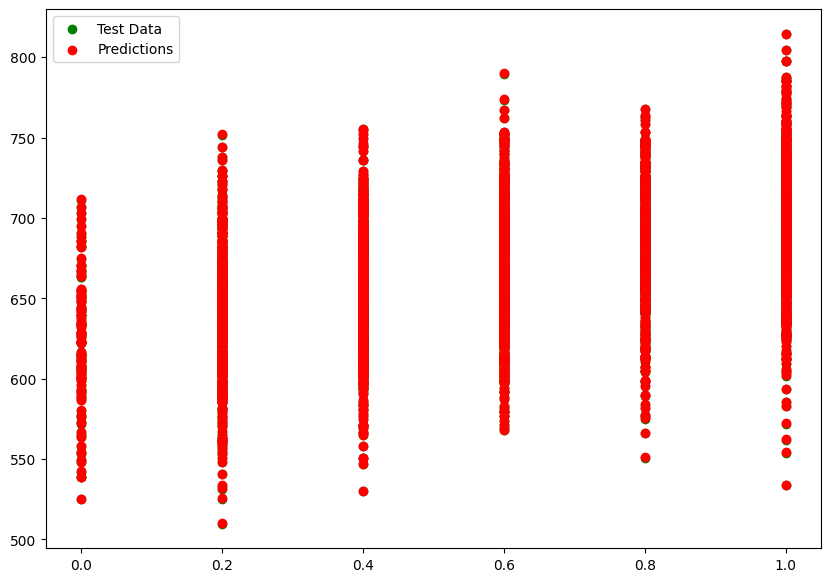

In [110]:
plot_predictions()